In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

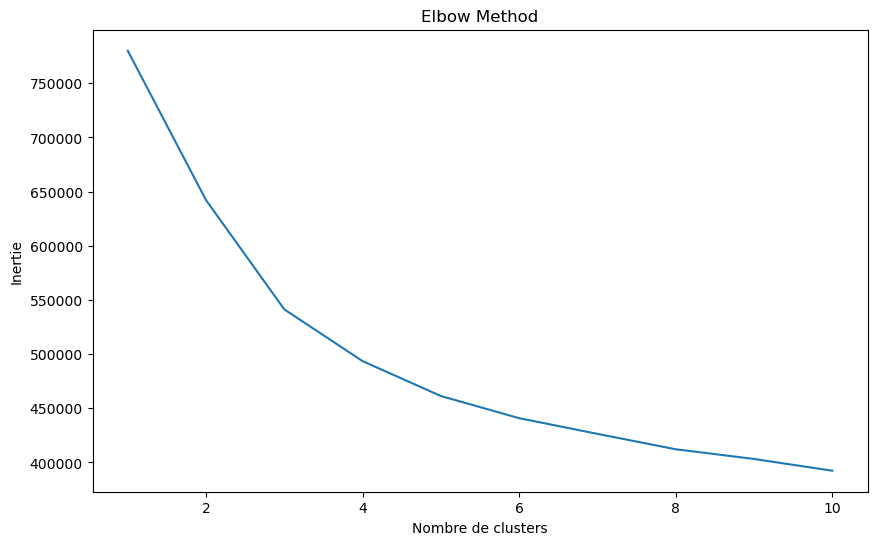

In [4]:
df = pd.read_csv('df_cleaned_engineered.csv')

X = df.drop(['TARGET'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1,11):
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    erreur = model.inertia_
    inertia.append(erreur)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.savefig('elbow_method.png')
plt.show()
plt.close()


In [5]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df['Cluster'].value_counts())

Cluster
1    13200
3    10008
0     3823
2     2969
Name: count, dtype: int64


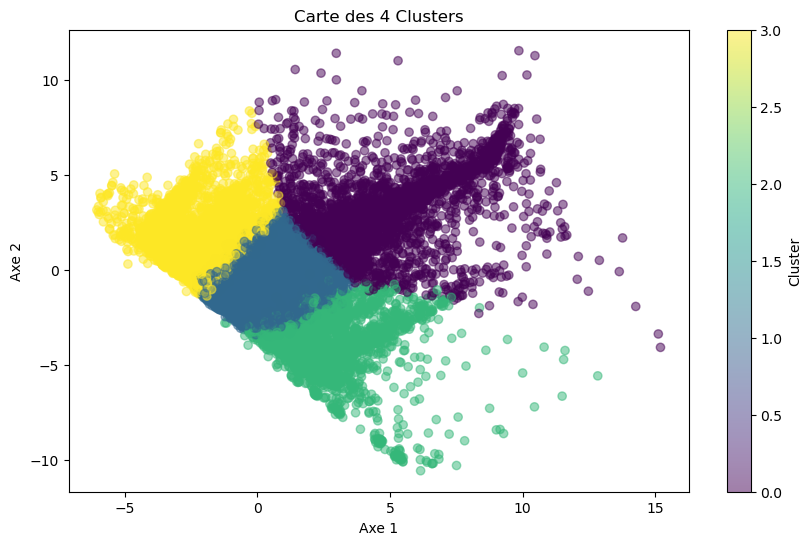

In [6]:
pca = PCA(n_components=2)
coords_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(coords_pca[:, 0], coords_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Carte des 4 Clusters')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

Profil des clusters (Moyennes) :
               AGE      LIMIT_BAL    TARGET  Count
Cluster                                           
0        36.947162  278246.842794  0.170547   3823
1        34.412424  109641.060606  0.188939  13200
2        34.987875   78585.382284  0.625463   2969
3        36.490108  225813.349321  0.163169  10008


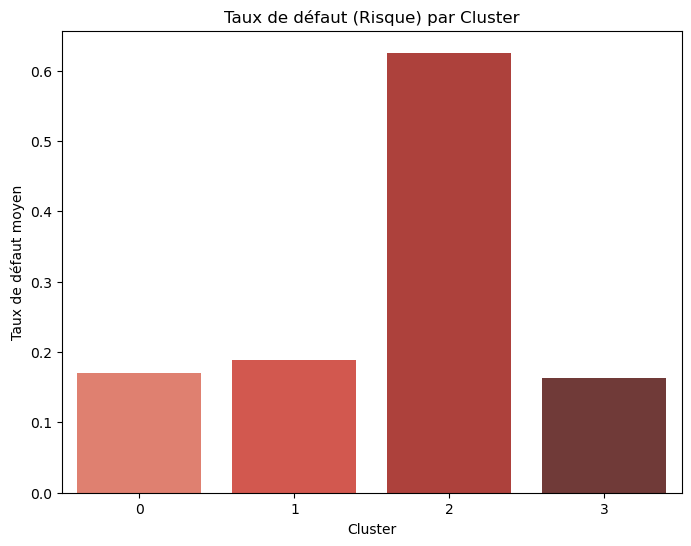

In [11]:
profile = df.groupby('Cluster').mean()
profile['Count'] = df['Cluster'].value_counts()

# Print profile for me to see
print("Profil des clusters (Moyennes) :")
print(profile[['AGE', 'LIMIT_BAL', 'TARGET', 'Count']].to_string())

# Taux de défaut par Cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=profile.index, y=profile['TARGET'], palette='Reds_d')
plt.title('Taux de défaut (Risque) par Cluster')
plt.ylabel('Taux de défaut moyen')
plt.xlabel('Cluster')
plt.show()
plt.close()